# Visualization of Important Variables

In [130]:
import copy 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

df_train_original_viz = pd.read_csv('/Users/amanprasad/Documents/Kaggle/House Prices/df_train_noNull21.csv')


In [3]:
#Visualization of important variables
df_train_viz_1=copy.deepcopy(df_train_original_viz)

In [4]:
# number of numeric variable
all_cols=df_train_viz_1.columns
num_cols=df_train_viz_1._get_numeric_data()

In [5]:
df_train_original = pd.read_csv('/Users/amanprasad/Documents/Kaggle/House Prices/house-prices-advanced-regression-techniques/House_price_train.csv')

df_train=copy.deepcopy(df_train_original)
df_train.head()

# removing id column
id=df_train['Id']
df_train=df_train.drop(['Id'],axis=1)

num_col=df_train._get_numeric_data()

In [6]:
cor_numVar=num_col.corr()
cor_numVar_sorted=cor_numVar['SalePrice'].sort_values(ascending=False)


In [131]:
name=cor_numVar_sorted[cor_numVar_sorted>0.5].index
final_cor_num=cor_numVar.loc[name,name]
final_cor_num

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
SalePrice,1.000000,0.790982,0.708624,0.640409,0.623431,0.613581,0.605852,0.560664,0.533723,0.522897,0.507101
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,0.550684
GrLivArea,0.708624,0.593007,1.000000,0.467247,0.468997,0.454868,0.566024,0.630012,0.825489,0.199010,0.287389
GarageCars,0.640409,0.600671,0.467247,1.000000,0.882475,0.434585,0.439317,0.469672,0.362289,0.537850,0.420622
GarageArea,0.623431,0.562022,0.468997,0.882475,1.000000,0.486665,0.489782,0.405656,0.337822,0.478954,0.371600
TotalBsmtSF,0.613581,0.537808,0.454868,0.434585,0.486665,1.000000,0.819530,0.323722,0.285573,0.391452,0.291066
1stFlrSF,0.605852,0.476224,0.566024,0.439317,0.489782,0.819530,1.000000,0.380637,0.409516,0.281986,0.240379
FullBath,0.560664,0.550600,0.630012,0.469672,0.405656,0.323722,0.380637,1.000000,0.554784,0.468271,0.439046
TotRmsAbvGrd,0.533723,0.427452,0.825489,0.362289,0.337822,0.285573,0.409516,0.554784,1.000000,0.095589,0.191740
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,0.592855


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

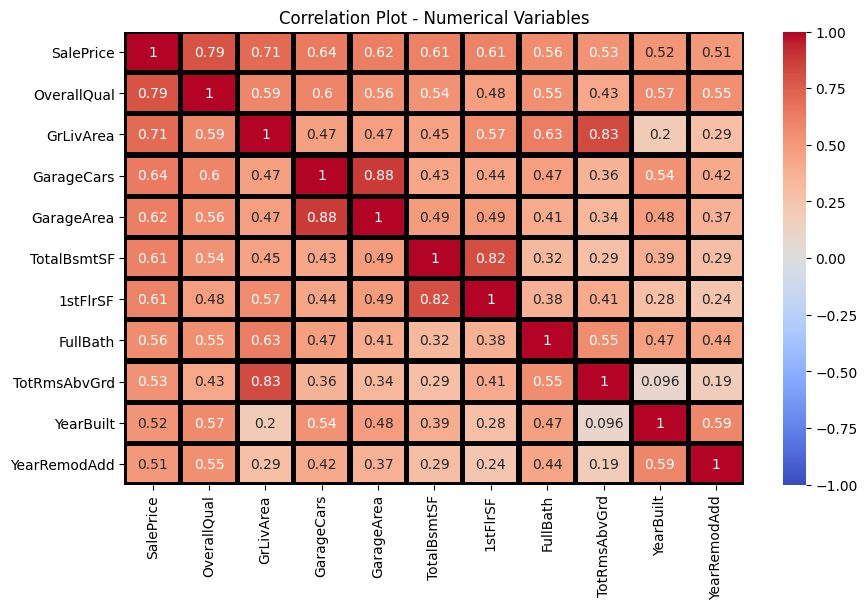

In [8]:
fig = plt.figure(figsize=(10,6), dpi=100)
sns.heatmap(final_cor_num, annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')
plt.title('Correlation Plot - Numerical Variables')
plt.tight_layout

In [9]:
# some of the important variables which have more than 0.5 correlation with target feature are as follows:
final_cor_num['SalePrice']

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

# Target variable - SalePrice

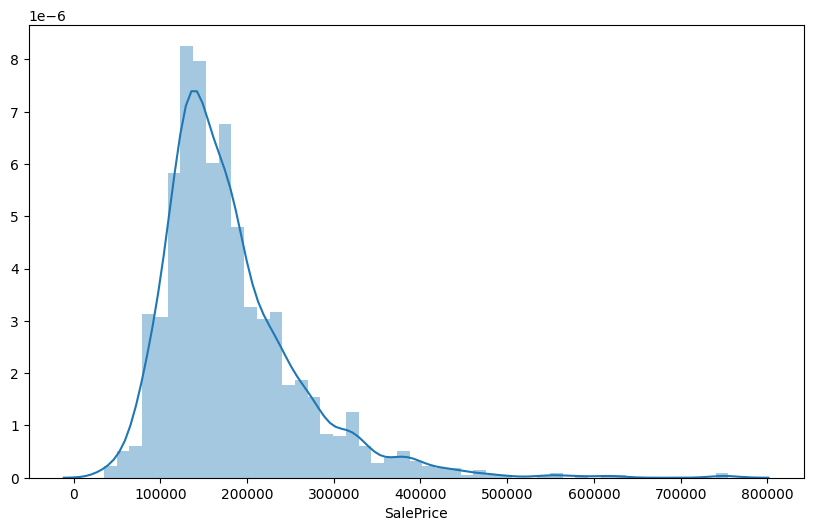

In [17]:
fig = plt.figure(figsize=(10,6), dpi=100)
sns.distplot(df_train['SalePrice'])

As we can see, the sale prices are right skewed. This was expected as few people can afford very expensive houses. I will keep this in mind, and take measures before modeling.

In [11]:
# we also see following details
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# Overall Quality
Overall Quality has the highest correlation with SalePrice among the numeric variables (0.79). 
It rates the overall material and finish of the house on a scale from 1 (very poor) to 10 (very excellent).


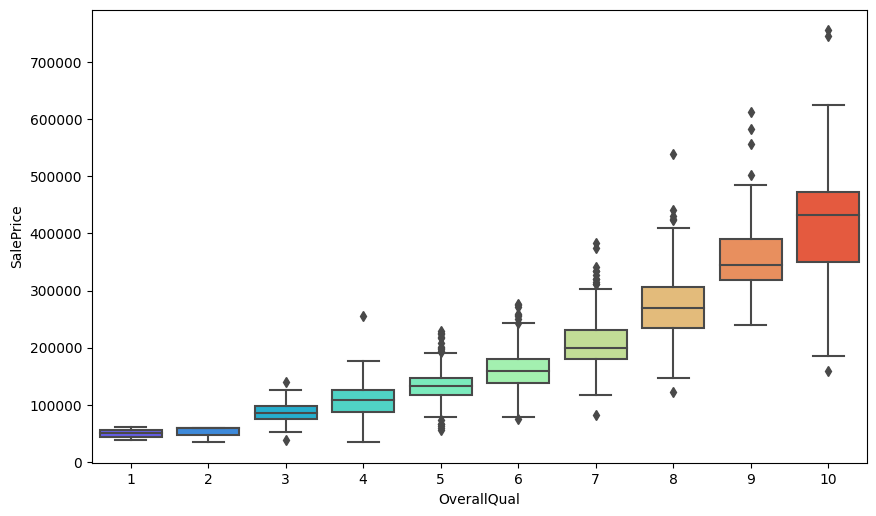

In [16]:
fig = plt.figure(figsize=(10,6), dpi=100)
sns.boxplot(x="OverallQual", y="SalePrice", data=df_train,palette='rainbow')

The positive correlation is certainly there indeed, and seems to be a slightly upward curve. 
Regarding outliers, I do not see any extreme values. 
If there is a candidate to take out as an outlier later on, it seems to be the expensive house with grade 4.

# Above Grade (Ground) Living Area (square feet) - GrLivArea
The numeric variable with the second highest correlation with SalesPrice is the Above Grade Living Area. 
This make a lot of sense; big houses are generally more expensive.

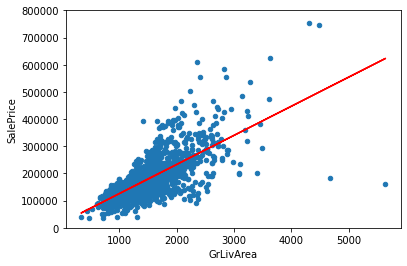

In [28]:
data = pd.concat([df_train['SalePrice'], df_train['GrLivArea']], axis=1)
data.plot.scatter(x='GrLivArea', y='SalePrice', ylim=(0,800000));

m, b = np.polyfit(df_train['GrLivArea'],df_train['SalePrice'], 1)
plt.plot(df_train['GrLivArea'], m*df_train['GrLivArea'] + b,color='red')

we see some outlier where GrLivArea>4000 and SalePrice<250000. We will fix this.

# Above Ground Living Area, and other surface related variables (in square feet)

As I have already visualized the relation between the Above Ground Living Area and SalePrice in my above 
explorations, I will now just display the distribution itself. As there are more ‘square feet’ surface measurements 
in the Top 20, I am taking the opportunity to bundle them in this section. 
Note: GarageArea is taken care of in the Garage variables section.

I am also adding ‘Total Rooms Above Ground’ (TotRmsAbvGrd) as this variable is highly correlated with the Above Ground Living Area(0.81).

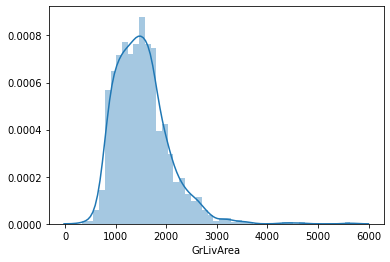

In [39]:
#GrLivArea - Square feet living area
sns.distplot(df_train['GrLivArea'])

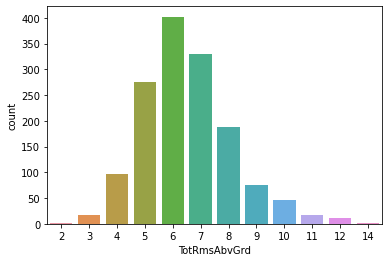

In [42]:
#TotRmsAbvGrd - Rooms above Ground
sns.countplot(df_train['TotRmsAbvGrd'])

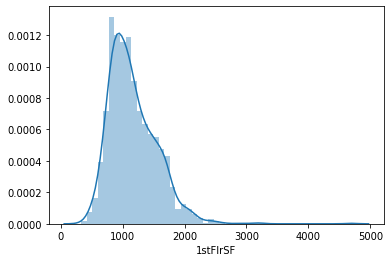

In [47]:
#X1stFlrSF - Square feet first floor
sns.distplot(df_train['1stFlrSF'])

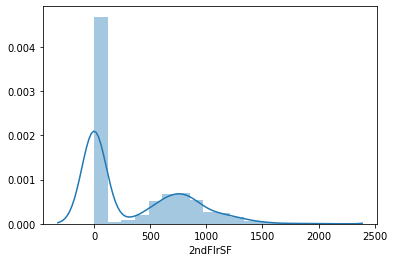

In [48]:
#2ndFlrSF - Square feet second floor
sns.distplot(df_train['2ndFlrSF'])

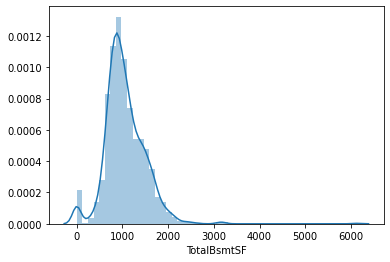

In [49]:
#TotalBsmtSF - Square feet basement
sns.distplot(df_train['TotalBsmtSF'])

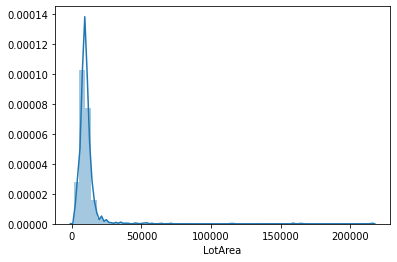

In [50]:
#LotArea - Square feet lot
sns.distplot(df_train['LotArea'])

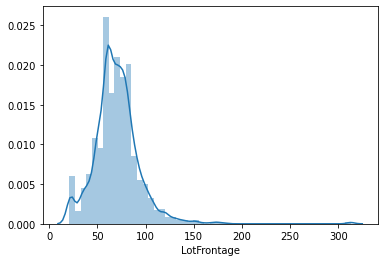

In [51]:
#LotFrontage - Linear feet lot frontage
sns.distplot(df_train['LotFrontage'])

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

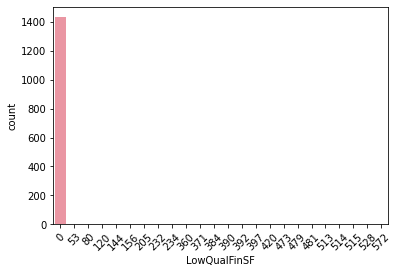

In [68]:
#LowQualFinSF - Low quality square feet 1st & 2nd
plt.figure()
chart1 = sns.countplot(df_train['LowQualFinSF'])
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.plot
plt.tight_layout

I will investigate several of these variables for outliers later on
GrLivArea seemed to be just the total of square feet 1st and 2nd floor. However, later, I discovered that there is also a variable called: LowQualFinSF: Low quality finished square feet (all floors). As you can see above (Low quality square feet 1st and 2nd) almost all houses have none of this (only 40 houses do have some). It turns out that these square feet are actually included in the GrLivArea. The correlation between those 3 variables and GrLivArea is exactely 1.

In [74]:
from scipy.stats import pearsonr
corr,_=pearsonr(df_train['GrLivArea'], (df_train['1stFlrSF'] + df_train['2ndFlrSF'] + df_train['LowQualFinSF']))
corr

1.0

In [79]:
df_train[df_train['LowQualFinSF']>0][['GrLivArea', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF']].head()

,GrLivArea,1stFlrSF,2ndFlrSF,LowQualFinSF
51,1176,816,0,360
88,1526,1013,0,513
125,754,520,0,234
170,1382,854,0,528
185,3608,1518,1518,572


# The most important categorical variable; Neighborhood

The first graph shows the median SalePrice by Neighorhood. The frequency (number of houses) of each Neighborhood in the train set is shown in the labels.

The second graph below shows the frequencies across all data.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

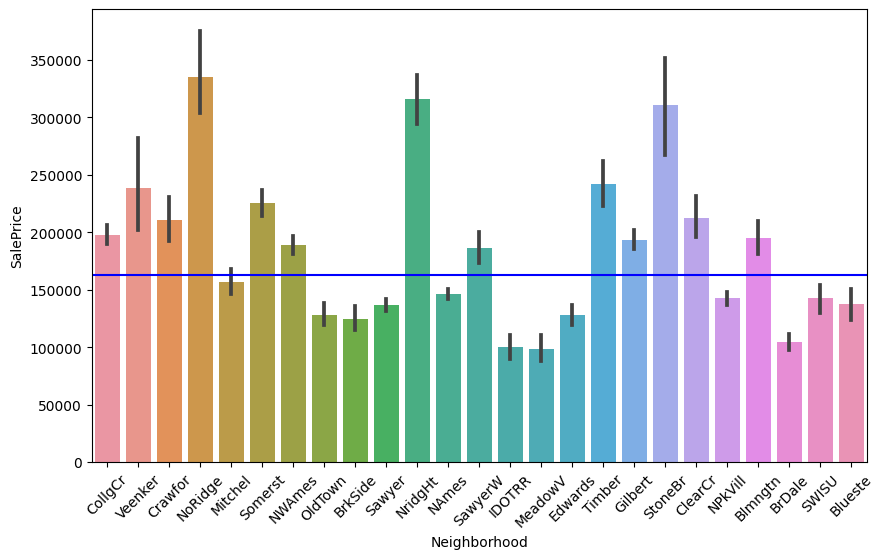

In [85]:
plt.figure(figsize=(10,6), dpi=100)
chart1 = sns.barplot(x='Neighborhood',y='SalePrice',data=df_train)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.show
chart2=plt.axhline(y=163000,color='b')
plt.show
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

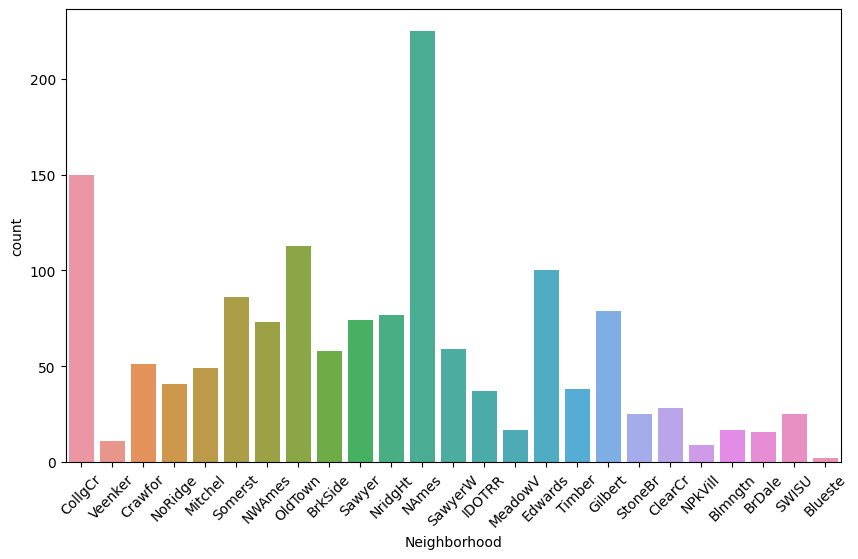

In [86]:
plt.figure(figsize=(10,6), dpi=100)
chart1 = sns.countplot('Neighborhood',data=df_train)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.show
plt.tight_layout

# Overall Quality, and other Quality variables
I have already visualized the relation between Overall Quality and SalePrice in my initial explorations, but I want to visualize the frequency distribution as well. As there are more quality measurements, I am taking the opportunity to bundle them in this section.

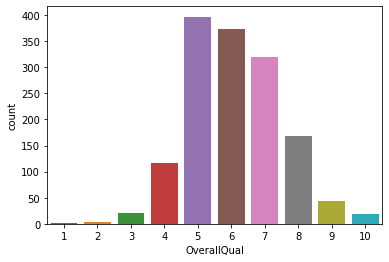

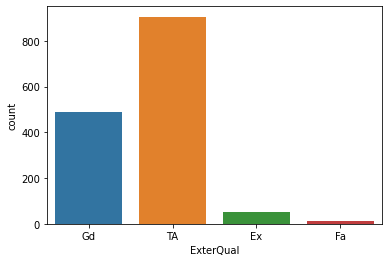

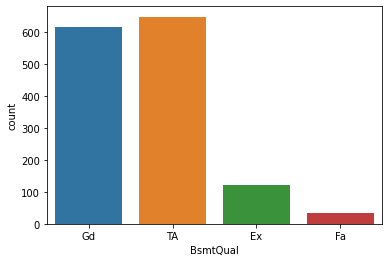

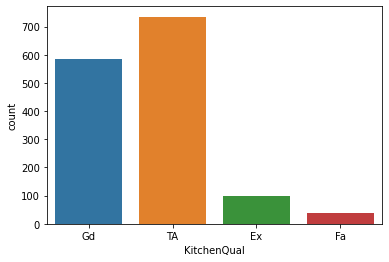

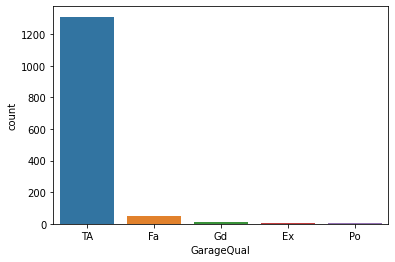

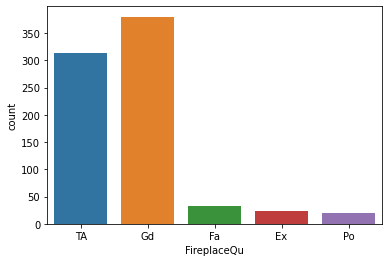

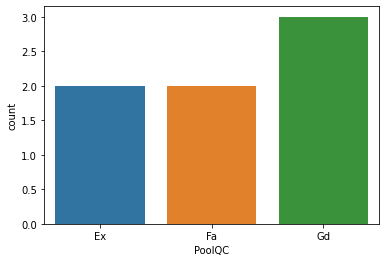

In [89]:
sns.countplot('OverallQual',data=df_train)
plt.show()
sns.countplot('ExterQual',data=df_train)
plt.show()
sns.countplot('BsmtQual',data=df_train)
plt.show()
sns.countplot('KitchenQual',data=df_train)
plt.show()
sns.countplot('GarageQual',data=df_train)
plt.show()
sns.countplot('FireplaceQu',data=df_train)
plt.show()
sns.countplot('PoolQC',data=df_train)
plt.show()

Overall Quality is very important, and also more granular than the other variables. External Quality is also improtant, but has a high correlation with Overall Quality (0.73). Kitchen Quality also seems one to keep, as all houses have a kitchen and there is a variance with some substance. Garage Quality does not seem to distinguish much, as the majority of garages have Q3. Fireplace Quality is in the list of high correlations, and in the important variables list. The PoolQC is just very sparse (the 13 pools cannot even be seen on this scale). I will look at creating a ‘has pool’ variable later on.

# The second most important categorical variable; MSSubClass

The first visualization shows the median SalePrice by MSSubClass. The frequency (number of houses) of each MSSubClass in the train set is shown in the labels.

The histrogram shows the frequencies across all data. Most houses are relatively new, and have one or two stories.

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

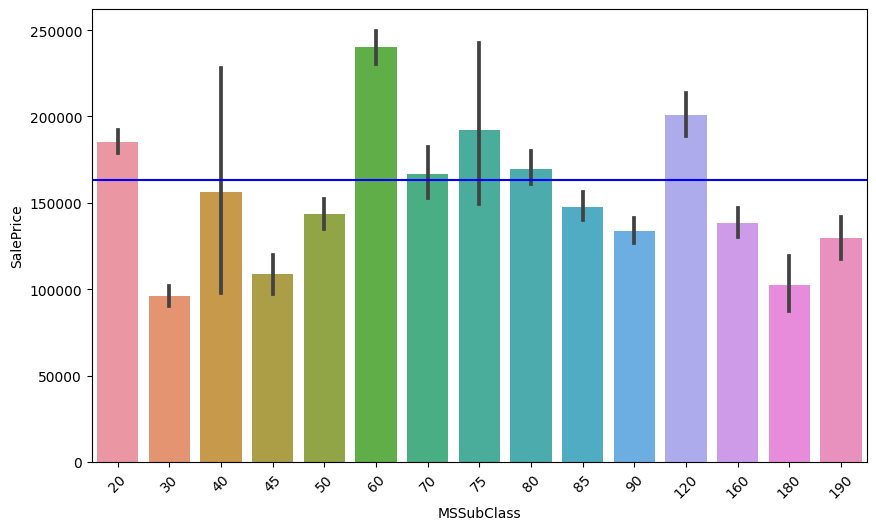

In [92]:
plt.figure(figsize=(10,6), dpi=100)
chart1 = sns.barplot(x='MSSubClass',y='SalePrice',data=df_train)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.show
chart2=plt.axhline(y=163000,color='b')
plt.show
plt.tight_layout

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

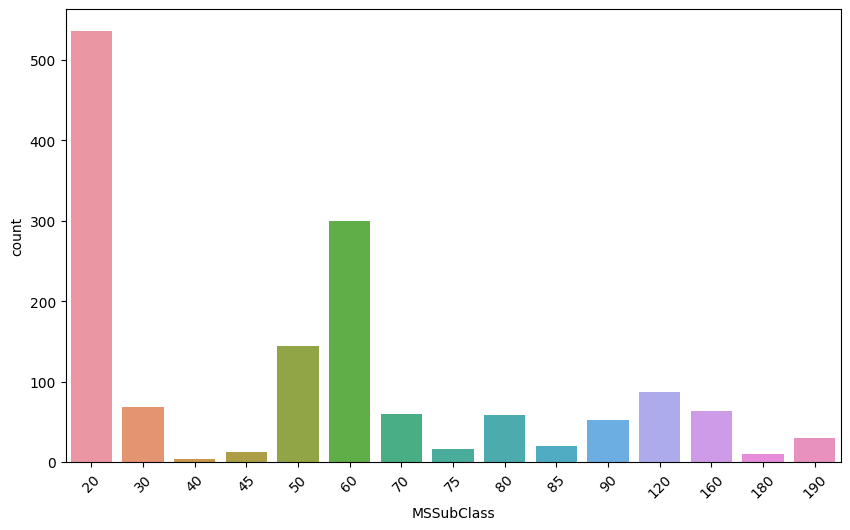

In [95]:
plt.figure(figsize=(10,6), dpi=100)
chart1 = sns.countplot('MSSubClass',data=df_train)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.show
plt.tight_layout

# Garage variables

Several Garage variables have a high correlation with SalePrice. However, there is multicolinearity among them and I think that 7 garage variables is too many anyway. I feel that something like 3 variables should be sufficient (possibly GarageCars, GarageType, and a Quality measurement), but before I do any selection I am visualizing all of them in this section.

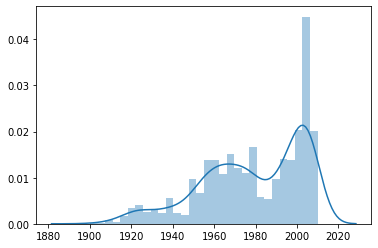

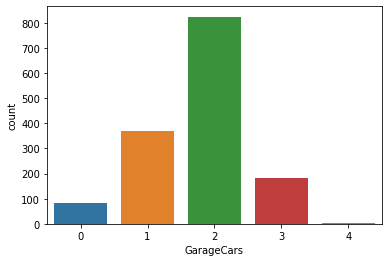

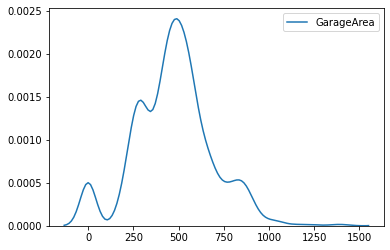

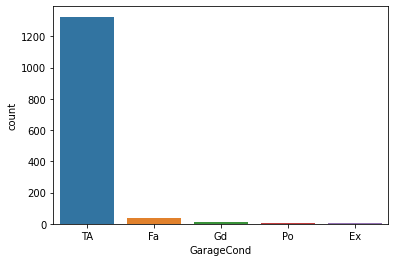

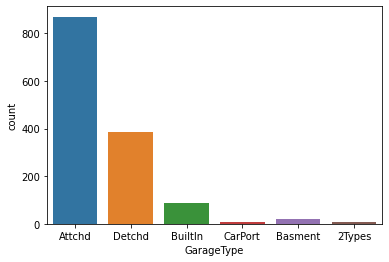

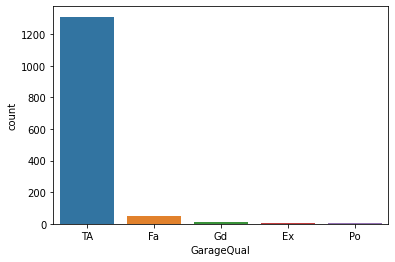

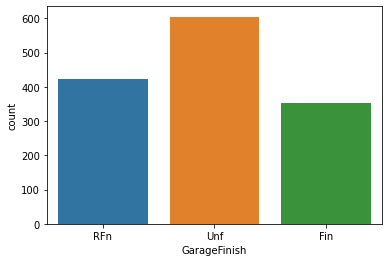

In [124]:
sns.distplot(df_train[df_train['GarageCars']!=0][['GarageYrBlt']],bins=30)
plt.show()
sns.countplot('GarageCars',data=df_train)
plt.show()
sns.kdeplot(df_train['GarageArea'])
plt.show()
sns.countplot('GarageCond',data=df_train)
plt.show()
sns.countplot('GarageType',data=df_train)
plt.show()
sns.countplot('GarageQual',data=df_train)
plt.show()
sns.countplot('GarageFinish',data=df_train)
plt.show()

GarageCars and GarageArea are highly correlated. Here, GarageQual and GarageCond also seem highly correlated, and both are dominated by level =3.

# Basement variables

Similar the garage variables, multiple basement variables are important in the correlations matrix. However, 11 basement variables seems an overkill. Before I decide what I am going to do with them, I am visualizing 8 of them below. The 2 “Bathroom” variables are dealt with in Feature Engineering.

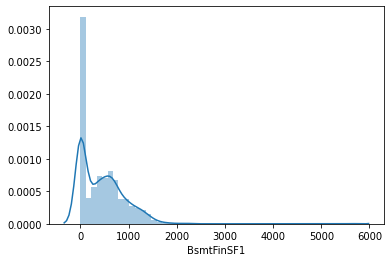

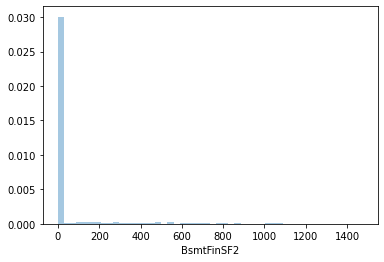

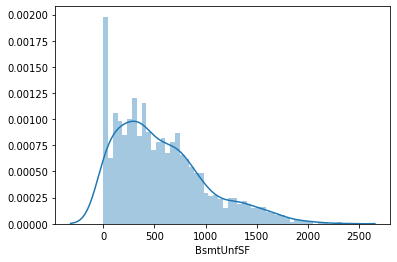

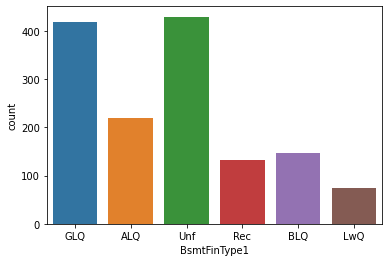

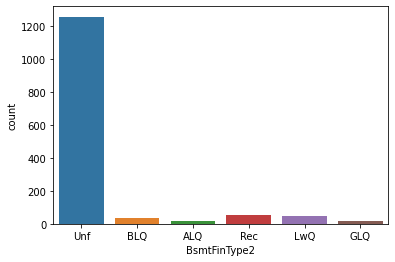

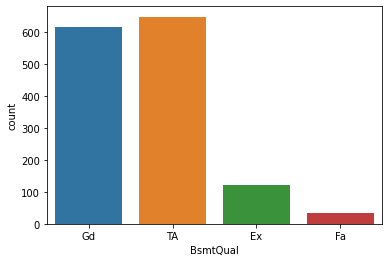

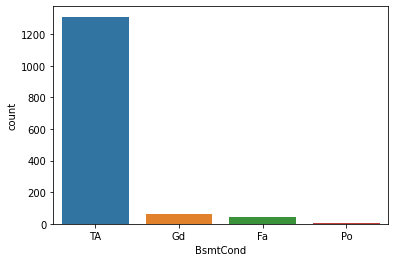

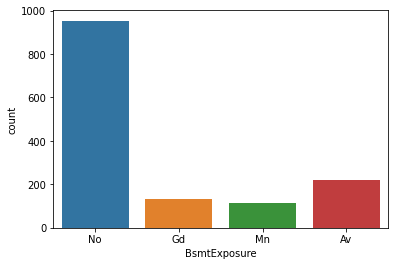

In [129]:
sns.distplot(df_train['BsmtFinSF1'],bins=50)
plt.show()
sns.distplot(df_train['BsmtFinSF2'],bins=50)
plt.show()
sns.distplot(df_train['BsmtUnfSF'],bins=50)
plt.show()
sns.countplot('BsmtFinType1',data=df_train)
plt.show()
sns.countplot('BsmtFinType2',data=df_train)
plt.show()
sns.countplot('BsmtQual',data=df_train)
plt.show()
sns.countplot('BsmtCond',data=df_train)
plt.show()
sns.countplot('BsmtExposure',data=df_train)
plt.show()

So it seemed as if the Total Basement Surface in square feet (TotalBsmtSF) is further broken down into finished areas (2 if more than one type of finish), and unfinished area. I did a check between the correlation of total of those 3 variables, and TotalBsmtSF. The correlation is exactely 1, so that’s a good thing (no errors or small discrepancies)!

Basement Quality is a confusing variable name, as it turns out that it specifically rates the Height of the basement.